## Predictive Analysis of Heart Attacks using a Machine Learning Classification Model

### Introduction

Lorem ipsum blah blah blah.

In [1]:
library(tidyverse)
library(repr)
library(recipes)
install.packages('cowplot')
library(cowplot)
library(GGally)
install.packages("tidymodels")
remove.packages("cli")
install.packages("cli")
library(tidymodels)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Regist

### Preliminary Exploratory Data Analysis

We will first read the dataset from the web into R, and then clean our data. Here, we notice that the class column has 0's and 1's. The 1's mean that the observation is not a significant heart disease, and 0's mean it is a significant heart disease.

In [15]:
# reading the data from the web
heart_data <- read_csv('https://raw.githubusercontent.com/NISH-Original/Heart-Attack-Analysis/main/heart.csv') |>
                    mutate(output = as.factor(output))

print('Table 1')
head(heart_data, 10)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1"


age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


Now, we scale our predictor variables, so that the prediction is not influenced by the different scales of all the predictors, thus avoiding inaccurate predictions.

In [16]:
heart_scaled <- heart_data |>
                    mutate(age_scaled = scale(age, center=TRUE)) |>
                    mutate(sex_scaled = scale(sex, center=TRUE)) |>
                    mutate(cp_scaled = scale(cp, center=TRUE)) |>
                    mutate(trtbps_scaled = scale(trtbps, center=TRUE)) |>
                    mutate(chol_scaled = scale(chol, center=TRUE)) |>
                    mutate(fbs_scaled = scale(fbs, center=TRUE)) |>
                    mutate(restecg_scaled = scale(restecg, center=TRUE)) |>
                    mutate(thalachh_scaled = scale(thalachh, center=TRUE)) |>
                    mutate(exng_scaled = scale(exng, center=TRUE)) |>
                    mutate(oldpeak_scaled = scale(oldpeak, center=TRUE)) |>
                    mutate(slp_scaled = scale(slp, center=TRUE)) |>
                    mutate(caa_scaled = scale(caa, center=TRUE)) |>
                    mutate(thall_scaled = scale(thall, center=TRUE)) |>
                    select(thall_scaled:output)

print('Table 2')
head(heart_scaled)

[1] "Table 2"


thall_scaled,caa_scaled,slp_scaled,oldpeak_scaled,exng_scaled,thalachh_scaled,restecg_scaled,fbs_scaled,chol_scaled,trtbps_scaled,cp_scaled,sex_scaled,age_scaled,output
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
-2.1453238,-0.713249,-2.2708221,1.0855423,-0.69548,0.01541728,-1.0041707,2.3904835,-0.25591036,0.76269408,1.96986425,0.6798805,0.9506240,1
-0.5120748,-0.713249,-2.2708221,2.1190672,-0.69548,1.63077374,0.8974776,-0.4169448,0.07208025,-0.09258463,1.00092128,0.6798805,-1.9121497,1
-0.5120748,-0.713249,0.9747397,0.3103986,-0.69548,0.97589950,-1.0041707,-0.4169448,-0.81542377,-0.09258463,0.03197832,-1.4659924,-1.4717230,1
-0.5120748,-0.713249,0.9747397,-0.2063639,-0.69548,1.23784920,0.8974776,-0.4169448,-0.19802967,-0.66277043,0.03197832,0.6798805,0.1798773,1
-0.5120748,-0.713249,0.9747397,-0.3786180,1.43311,0.58297496,0.8974776,-0.4169448,2.07861109,-0.66277043,-0.93696465,-1.4659924,0.2899839,1
-2.1453238,-0.713249,-0.6480412,-0.5508722,-0.69548,-0.07189928,0.8974776,-0.4169448,-1.04694656,0.47760118,-0.93696465,0.6798805,0.2899839,1


Next, we split the data into 75% training and 25% testing.

In [17]:
set.seed(100)

heart_split <- heart_scaled |>
                    initial_split(prop=3/4, strata=output)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

Now, we search for missing data in our dataset.

In [18]:
missing_data <- heart_training |>
                    map_df(~sum(is.na(.)))

print("Table 3")
missing_data |> pivot_longer(cols = everything(), 
                                    names_to = 'columns',
                                    values_to = 'no. of NA')

[1] "Table 3"


columns,no. of NA
<chr>,<int>
thall_scaled,0
caa_scaled,0
slp_scaled,0
oldpeak_scaled,0
exng_scaled,0
thalachh_scaled,0
restecg_scaled,0
fbs_scaled,0
chol_scaled,0


Fortunately, this dataset does not contain any missing data that we need to account for.

So, we can proceed with finding the number of observations for each output 0 and 1.

In [19]:
class_counts <- heart_training |>
                    group_by(output) |>
                    dplyr::summarize(count = n())

print("Table 4")
class_counts

[1] "Table 4"


output,count
<fct>,<int>
0,103
1,123


The classes seem to be well balanced, so upsampling is not required. Now, we will observe the means of all the numerical variables for each output to find out how correlated they are for each output.

In [20]:
means <- heart_training |>
            group_by(output) |>
            summarize_at(vars(everything()), mean)

print("Table 6")
means

[1] "Table 6"


output,thall_scaled,caa_scaled,slp_scaled,oldpeak_scaled,exng_scaled,thalachh_scaled,restecg_scaled,fbs_scaled,chol_scaled,trtbps_scaled,cp_scaled,sex_scaled,age_scaled
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.4234756,0.3311032,-0.4432242,0.5537285,0.4618118,-0.3762357,-0.08104048,-0.03535260,0.1014889,0.06186376,-0.4948256,0.2840399,0.1039785
1,-0.2730627,-0.3475327,0.3414593,-0.3730163,-0.3839790,0.4104715,0.07806815,-0.02892625,-0.0096429,-0.12920631,0.3943472,-0.2622100,-0.2292183


We see that the means are very different for classes 0 and 1 which helps in differentiating them from each other. We will now plot them in pairs to better visualise the correlations.

NULL

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


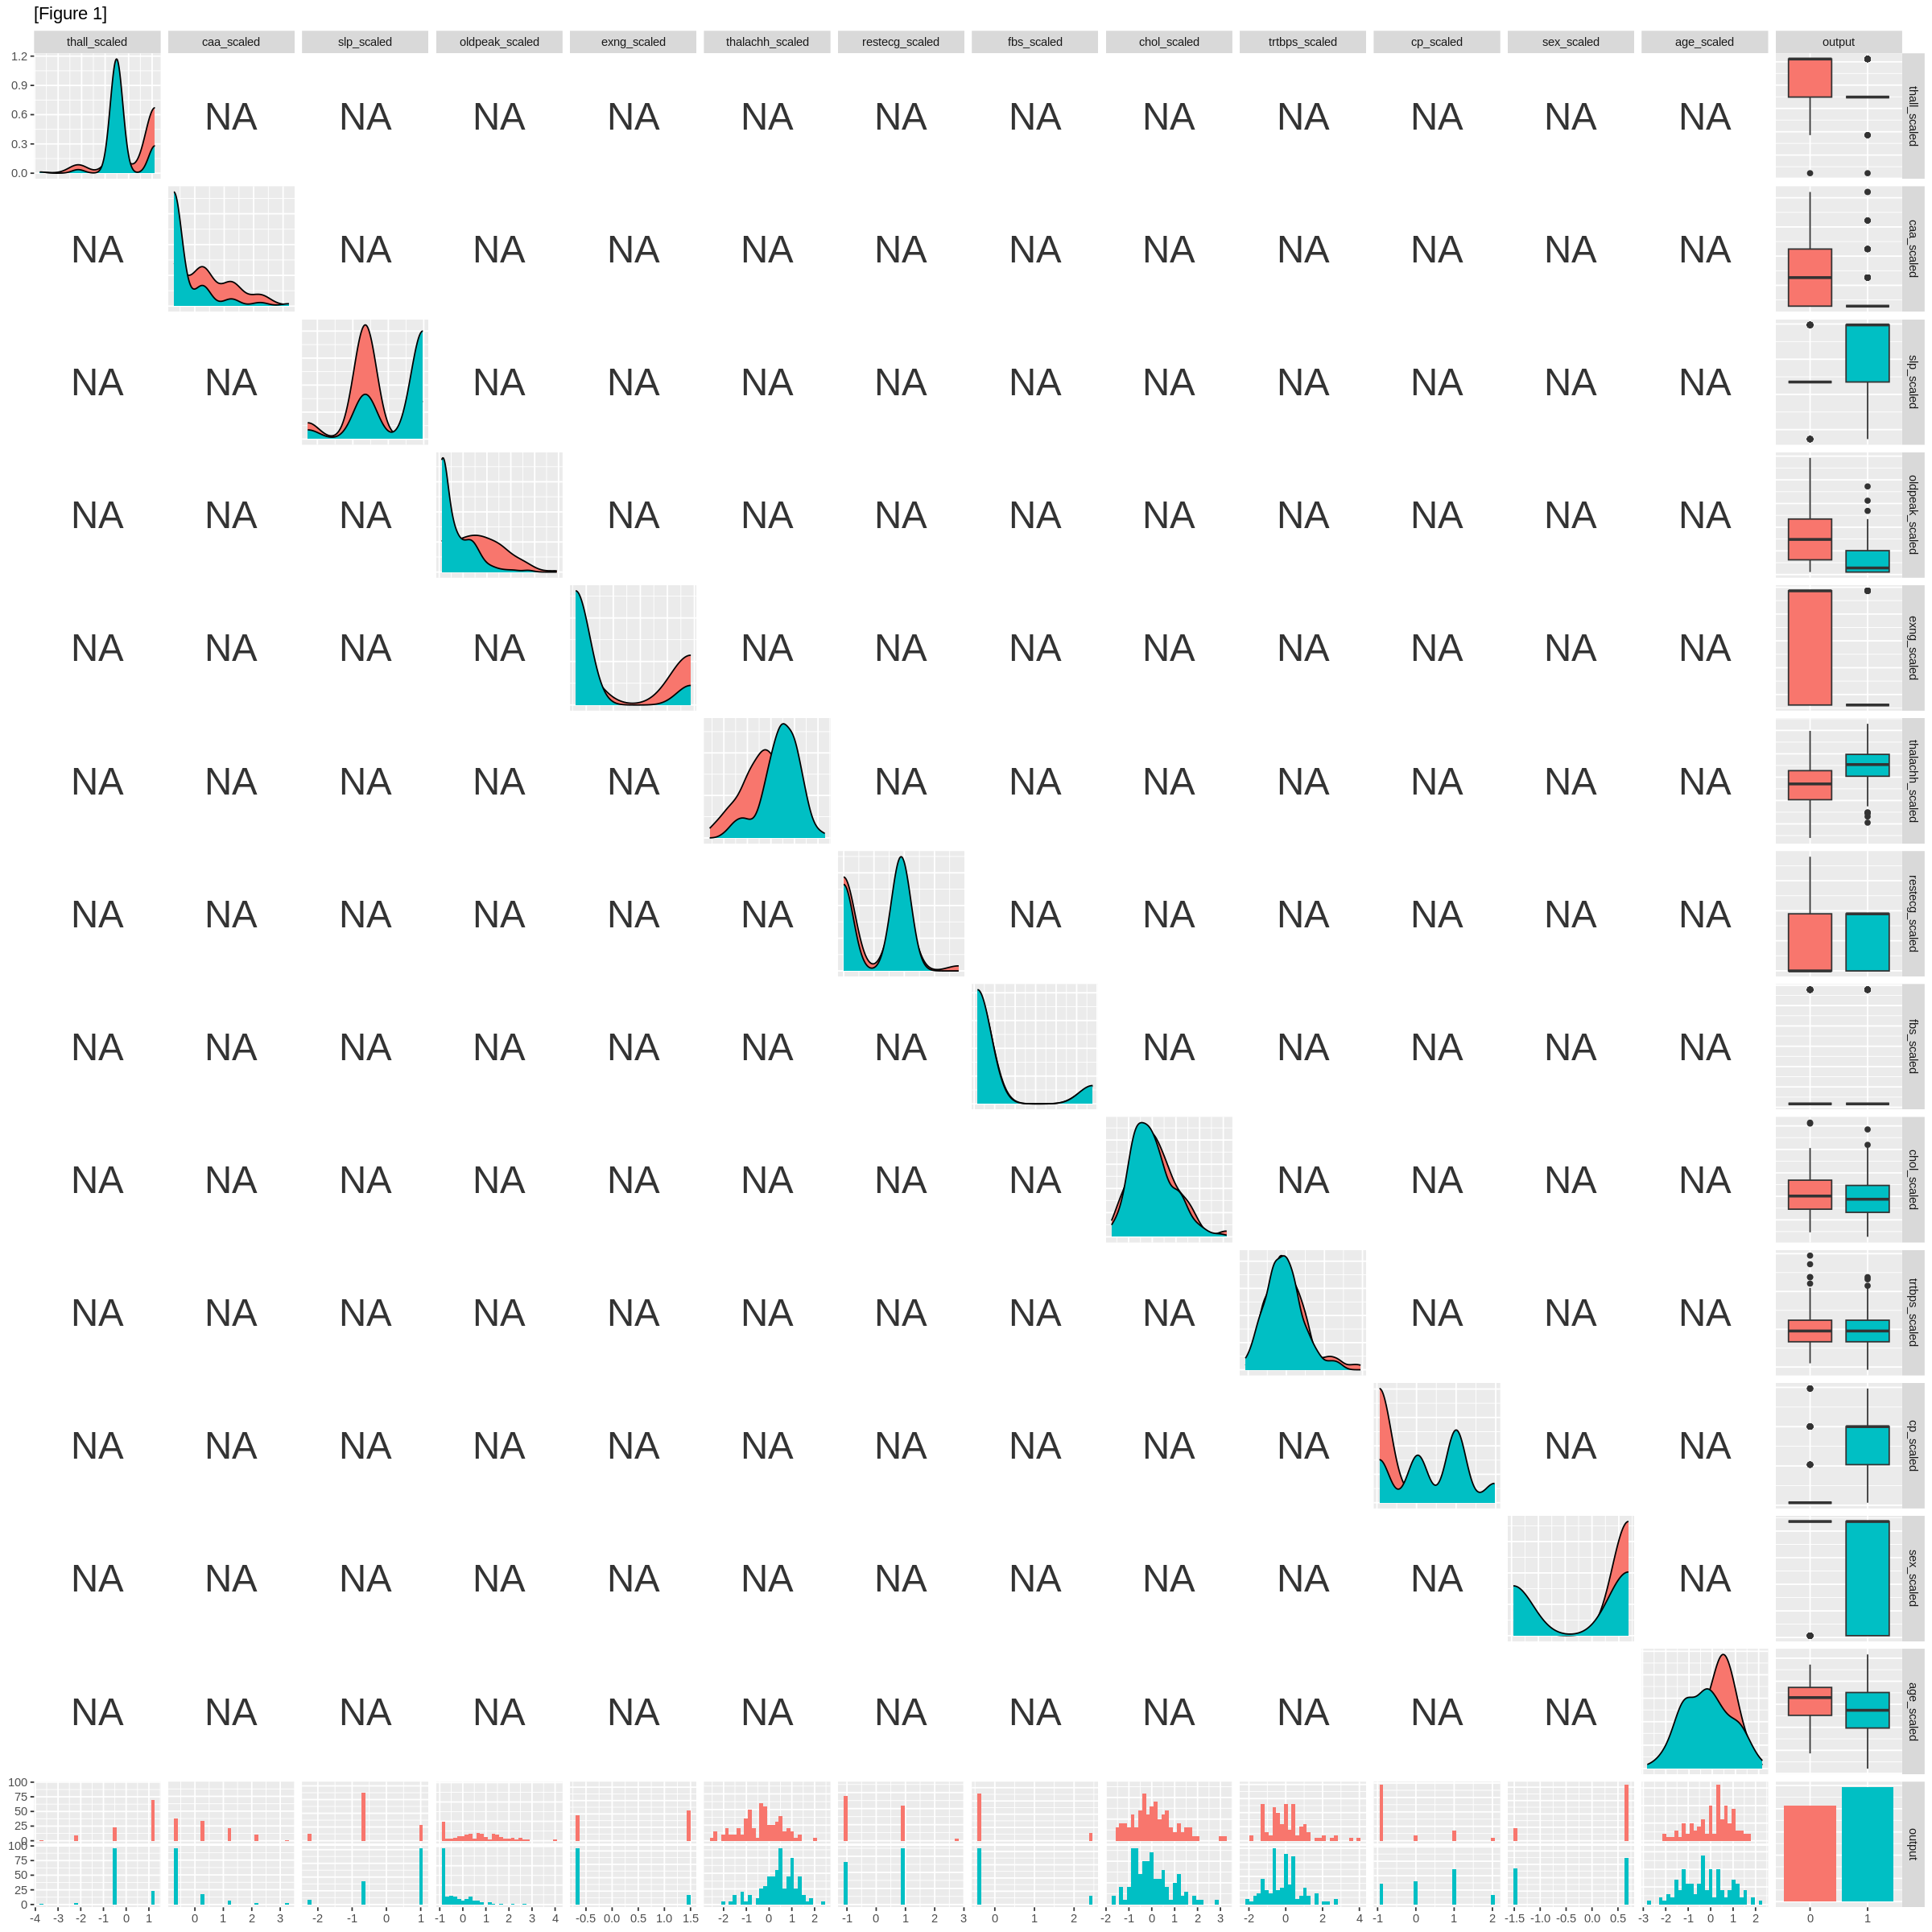

In [21]:
options(repr.plot.width = 20, repr.plot.height = 20)

pairs_plot <- heart_training |>
                ggpairs(aes(color=output)) +
                ggtitle("[Figure 1]")
                labs(color=class) +
                theme(text=element_text(size=30))
 
pairs_plot